In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from the working folder
data is labelled data.csv

In [38]:
df = pd.read_csv("data.csv", parse_dates= ["Timestamp"]) #read the csv file into a pandas dataframe

In [39]:
df.head(10) #confirm data was loaded

,Timestamp,feed_flowrate,level,air_flowrate,valve,fault1,fault2
0,2021-08-02 09:58:50,149.175000,76.186249,17.190749,1.111165,0,0
1,2021-08-02 09:58:55,149.429144,77.691251,17.347500,2.240384,0,0
2,2021-08-02 09:59:00,149.575165,78.826248,17.347500,2.886613,0,0
3,2021-08-02 09:59:05,149.440030,79.413750,17.347500,3.255154,0,0
4,2021-08-02 09:59:10,149.472055,80.506250,17.356125,3.980078,0,0
5,2021-08-02 09:59:15,149.575641,82.287498,17.328000,5.611198,0,0
6,2021-08-02 09:59:20,149.507553,83.001251,17.317125,6.024781,0,0
7,2021-08-02 09:59:25,149.448965,84.032498,17.269125,7.061505,0,0
8,2021-08-02 09:59:30,149.415601,84.322501,17.329500,7.176516,0,0
9,2021-08-02 09:59:35,149.377209,85.414998,17.479875,8.326157,0,0


In [40]:
df.info() #check data types + missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114986 entries, 0 to 114985
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      114986 non-null  datetime64[ns]
 1   feed_flowrate  114986 non-null  float64       
 2   level          114986 non-null  float64       
 3   air_flowrate   114986 non-null  float64       
 4   valve          114986 non-null  float64       
 5   fault1         114986 non-null  int64         
 6   fault2         114986 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 6.1 MB


In [41]:
df.describe() #decriptive stats

,feed_flowrate,level,air_flowrate,valve,fault1,fault2
count,114986.000000,114986.000000,114986.000000,114986.000000,114986.000000,114986.000000
mean,163.919841,84.316624,16.944104,14.733416,0.540979,0.565104
std,20.389275,2.258215,1.989265,5.059550,0.498320,0.495746
min,51.266031,26.443750,12.172501,1.005030,0.000000,0.000000
25%,148.001948,83.718750,15.677626,11.320726,0.000000,0.000000
50%,169.123918,84.753749,16.942125,14.662882,1.000000,1.000000
75%,175.751568,85.267499,18.208499,17.897948,1.000000,1.000000
max,239.537106,95.894998,23.459625,90.544580,1.000000,1.000000


In [42]:
df.isnull().sum() #confirm check for missing values

Timestamp        0
feed_flowrate    0
level            0
air_flowrate     0
valve            0
fault1           0
fault2           0
dtype: int64

# Exploratory Data Analysis

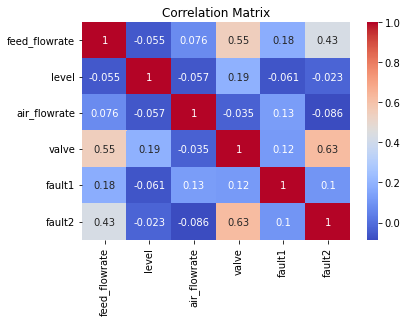

In [43]:
sns.heatmap(df.corr(), annot=True, cmap = "coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [44]:
df.isnull().sum() #check for null values

Timestamp        0
feed_flowrate    0
level            0
air_flowrate     0
valve            0
fault1           0
fault2           0
dtype: int64

Fault2 (blockage in the tailings valves) seems to have a "higher"/stronger positive linear correlation with tailings valve opening (0.63). It also has a slightly positive linear correlation with feed_flowrate (0.43) as well. These could be great predictors for fault2 (blockage in the tailigns valves). 

An option later on could be to investigate if dropping the other predictors could improve runtime or have a negative bearing on the selected model

The correlation matrix for fault1 (opening / closing of valve to control cell pulp level) illustrated low correlation with the 4 predictors (feed_flowrate, cell pulp level, air flowrate and tailings valve). 

Realtively low linear correlations amongst all the predictors (this is a good thing and this was (probably) likely to be expected)

Note: df_corr returns the Pearson Correlation Coefficient NOT the R2 value. 

In [45]:
df.columns

Index(['Timestamp', 'feed_flowrate', 'level', 'air_flowrate', 'valve',
       'fault1', 'fault2'],
      dtype='object')

In [46]:
X = df.drop(columns = ["Timestamp","fault1", "fault2"])
y1 = df["fault1"]
y2 = df["fault2"]

In [47]:
X.columns #confirm feature dataframe

Index(['feed_flowrate', 'level', 'air_flowrate', 'valve'], dtype='object')

In [48]:
X.head(10)

,feed_flowrate,level,air_flowrate,valve
0,149.175000,76.186249,17.190749,1.111165
1,149.429144,77.691251,17.347500,2.240384
2,149.575165,78.826248,17.347500,2.886613
3,149.440030,79.413750,17.347500,3.255154
4,149.472055,80.506250,17.356125,3.980078
5,149.575641,82.287498,17.328000,5.611198
6,149.507553,83.001251,17.317125,6.024781
7,149.448965,84.032498,17.269125,7.061505
8,149.415601,84.322501,17.329500,7.176516
9,149.377209,85.414998,17.479875,8.326157


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
random_state = 52
X1_train, X1_test, y1_train, y1_test = train_test_split(X,y1,test_size = 0.3, random_state = random_state)
X2_train, X2_test, y2_train, y2_test = train_test_split(X,y2,test_size = 0.3, random_state = random_state)

In [50]:
print((X1_train == X2_train).all())

#checking if the training sets are the same, not that it matters but just wanted to check if the use of the same seed  would yield the same training set

feed_flowrate    True
level            True
air_flowrate     True
valve            True
dtype: bool


In [51]:
# instanciation of selected models for evaluation 
# evaluating model perfomance using default hyperparameters 
#selected models are Logistic Regression and 4 ensemble models: Decision Tree, Random Forest, XGBoost and Gradient Boosting Classifieer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

#scores kept changing during code evlauation even though I set the random_state in the train_test_split function. 
#So I have set the random seed when creating class instances of the models to ensure reproducibility of the results.
#random_state was set in the train_test_split cell

lr = LogisticRegression(random_state = random_state)
dt = DecisionTreeClassifier(random_state = random_state)
rf = RandomForestClassifier(random_state = random_state)
gbc = GradientBoostingClassifier(random_state = random_state)
xgb = XGBClassifier(random_state = random_state)


# Having to use a dictionary so I can access the actual model objects later. 
models = {"LogisticRegression": lr,             #can not use naming like "Decision Tree Classifier" with spaces because model.__class__.name__ returns the actual name of the class which needs to be the same as dict key when accessing it for evaluting the best model
          "DecisionTreeClassifier": dt,
          "RandomForestClassifier": rf,
          #"GradientBoostingClassifier": gbc,
          #"XGBClassifier": xgb
          }

In [52]:
from sklearn.model_selection import cross_val_score

def compare_models(models, X_train, X_test, y_train, y_test):
    """
    Evaluate multiple models and return their performance metrics.
    
    Parameters:
    - models: Dictionary of model names and their instances.
    - X_train: Training features.
    - X_test: Testing features.
    - y_train: Training labels.
    - y_test: Testing labels.
    
    Returns:
    - result_df: DataFrame containing model names and their F1 scores
    - best_model_name: Name of the best model based on F1 score.
    - best_model_f1_score: F1 score of the best model.
    - best_model: The best model instance.
    """
    

    result = {}

    for model in models.values():               #models.values() adopted after switching from list to dictionary
        model.fit(X_train, y_train)             #fit the model to the training data
        y_pred = model.predict(X_test)          #predict on the test data
        report = classification_report(y_test, y_pred, output_dict = True) 
        result.update({model.__class__.__name__ : report["weighted avg"]["f1-score"]})

    result_dict = {"models": list(result.keys()),
                "f1-scores": list(result.values())}
    result_df = pd.DataFrame(result_dict).sort_values(by = "f1-scores", ascending = False)  #selected the weighted average of f1-score (mean of precision and recall) as the metric for evaluation, and weighted average takes into account distribution of classes.
    result_df.reset_index(drop = True, inplace = True) #reset the index of the dataframe, drop old index
    best_model_name = result_df.iloc[0,0]
    best_model_f1_score = result_df.iloc[0,1]
    best_model = models[best_model_name]
    
    return result_df, best_model_name, best_model_f1_score, best_model

def evaluate_best_model(best_model, X_train, X_test, y_train,y_test):
    """
    Evaluate the best model using classification report.
    
    Parameters:
    - model: The best model instance.
    - X_train: Training features.
    - X_test: Testing features.
    - y_train: Training labels.
    - y_test: Testing labels.
    
    Returns:
    - report: Classification report of the model.
    """
    
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict = True)
    report_df = pd.DataFrame(report).T     
    
    return report_df
    
    

In [53]:
from sklearn.model_selection import cross_val_score

#evaluating the models
def evaluate_models(models, X_train, X_test, y_train, y_test):
    fault_model = compare_models(models, X_train,X_test,y_train,y_test)
    result_df = fault_model[0]
    print("-" * 50)
    print(result_df)
    print("-" * 50)
    print(f"The best model is { fault_model[1]} with an f-1 score of {round(fault_model[2],2)}")
    print("-" * 50)
    best_model = fault_model[3]
    best_model_classification_report = evaluate_best_model(best_model, X_train,X_test,y_train,y_test)
    individual_scores = cross_val_score(best_model, X_train, y_train, cv = 5)
    print(f"Individual Cross Valaidation Scores: {[round(score,2) for score in individual_scores]} with a mean of {round(individual_scores.mean(),2)}")
    print("-" * 50)
    return best_model, best_model_classification_report

In [54]:
#fault1

evaluate_models(models, X1_train, X1_test, y1_train, y1_test)

--------------------------------------------------
                   models  f1-scores
0  RandomForestClassifier   0.971084
1  DecisionTreeClassifier   0.947718
2      LogisticRegression   0.596513
--------------------------------------------------
The best model is RandomForestClassifier with an f-1 score of 0.97
--------------------------------------------------
Individual Cross Valaidation Scores: [0.97, 0.97, 0.97, 0.96, 0.97] with a mean of 0.97
--------------------------------------------------


(RandomForestClassifier(random_state=52),
               precision    recall  f1-score       support
 0              0.962064  0.974717  0.968350  15663.000000
 1              0.978741  0.968035  0.973358  18833.000000
 accuracy       0.971069  0.971069  0.971069      0.971069
 macro avg      0.970402  0.971376  0.970854  34496.000000
 weighted avg   0.971169  0.971069  0.971084  34496.000000)

In [55]:
#fault2

evaluate_models(models, X2_train, X2_test, y2_train, y2_test)

--------------------------------------------------
                   models  f1-scores
0  RandomForestClassifier   0.981282
1  DecisionTreeClassifier   0.964406
2      LogisticRegression   0.869402
--------------------------------------------------
The best model is RandomForestClassifier with an f-1 score of 0.98
--------------------------------------------------
Individual Cross Valaidation Scores: [0.97, 0.98, 0.98, 0.98, 0.98] with a mean of 0.98
--------------------------------------------------


(RandomForestClassifier(random_state=52),
               precision    recall  f1-score       support
 0              0.974580  0.982515  0.978531  14984.000000
 1              0.986488  0.980320  0.983394  19512.000000
 accuracy       0.981273  0.981273  0.981273      0.981273
 macro avg      0.980534  0.981417  0.980963  34496.000000
 weighted avg   0.981315  0.981273  0.981282  34496.000000)

# Commentary
At this point the selected models seems adequate with High Precision, Recall and F1-Scores higher than 97%.   
The models have also been evaluated using cross_val_score using 5 folds and attained acceptable classification metrics.   
These will be adopted as the optimal models for further pipelining and deployment into production.   


# Improving Models

In the event of poor model perfomance, a couple of options are available to experiment with. 

Before resorting to resorce intensive tuning, I could start of with pre-processing the data (scaling wasn't conducted earlier).   
For example I will attempt to scale the feature set and use it to build another regressionlogistic model for fault 2 prediction (current F1-score ~  86%)

In [56]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X2_train_scaled = sc.fit_transform(X2_train)
X2_test_scaled = sc.fit_transform(X2_test)

# fault2 models evaluation used scaled feature set

evaluate_models(models, X2_train_scaled, X2_test_scaled, y2_train, y2_test)



--------------------------------------------------
                   models  f1-scores
0  RandomForestClassifier   0.980643
1  DecisionTreeClassifier   0.962370
2      LogisticRegression   0.869052
--------------------------------------------------
The best model is RandomForestClassifier with an f-1 score of 0.98
--------------------------------------------------
Individual Cross Valaidation Scores: [0.97, 0.98, 0.98, 0.98, 0.98] with a mean of 0.98
--------------------------------------------------


(RandomForestClassifier(random_state=52),
               precision    recall  f1-score       support
 0              0.974480  0.981113  0.977785  14984.000000
 1              0.985420  0.980269  0.982837  19512.000000
 accuracy       0.980635  0.980635  0.980635      0.980635
 macro avg      0.979950  0.980691  0.980311  34496.000000
 weighted avg   0.980668  0.980635  0.980643  34496.000000)

Scaling the featureset using standard scaler has not really improved the perfomance of the LogisticRegression model.  
There is also no discernible benefit to the other models as well.   

# Further Improvements to Models

Further improvements could be done to tune the models using models like GridSearchCv to attain incremental improvements to accuracy metrics. to illustrate this workflow I have devided to tune the Decision Tree Model using GridSearch


In [57]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ["gini", "entropy"],
    'max_depth': [10, 20],
}

def model_grid_search(model, X_train, y_train, param_grid):
    grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = 'f1_weighted', cv = 5, verbose  =2)
    grid.fit(X_train, y_train)
    return grid.best_params_

In [58]:
model_grid_search(dt, X1_train, y1_train, param_grid = param_grid)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .......................criterion=gini, max_depth=10; total time=   0.2s
[CV] END .......................criterion=gini, max_depth=10; total time=   0.2s
[CV] END .......................criterion=gini, max_depth=10; total time=   0.2s
[CV] END .......................criterion=gini, max_depth=10; total time=   0.1s
[CV] END .......................criterion=gini, max_depth=10; total time=   0.2s
[CV] END .......................criterion=gini, max_depth=20; total time=   0.2s
[CV] END .......................criterion=gini, max_depth=20; total time=   0.2s
[CV] END .......................criterion=gini, max_depth=20; total time=   0.2s
[CV] END .......................criterion=gini, max_depth=20; total time=   0.2s
[CV] END .......................criterion=gini, max_depth=20; total time=   0.2s
[CV] END ....................criterion=entropy, max_depth=10; total time=   0.2s
[CV] END ....................criterion=entropy, m

{'criterion': 'entropy', 'max_depth': 20}

In [59]:
dt_best_model = DecisionTreeClassifier(random_state = random_state, criterion = "entropy", max_depth = 20) # using best parameters from grid search

def tuned_model_eval(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train) 
    best_params_pred = model.predict(X_test)
    best_params_report = classification_report(y_test, best_params_pred, output_dict = True)
    best_params_report_df = pd.DataFrame(best_params_report).T
    cross_val_scores = cross_val_score(dt_best_model,X_train, y_train, cv = 5)
    cross_val_scores_mean = cross_val_scores.mean()
    return (cross_val_scores, cross_val_scores_mean, best_params_report_df)

#evaluating the tuned model using fault1 dataset

tuned_model_eval(dt_best_model,X1_train, X1_test, y1_train, y1_test)


(array([0.94278792, 0.94166977, 0.94216673, 0.94191825, 0.94632874]),
 0.9429742825195676,
               precision    recall  f1-score       support
 0              0.938379  0.953776  0.946015  15663.000000
 1              0.961025  0.947911  0.954423  18833.000000
 accuracy       0.950574  0.950574  0.950574      0.950574
 macro avg      0.949702  0.950843  0.950219  34496.000000
 weighted avg   0.950743  0.950574  0.950605  34496.000000)

# Commentary

Tuning the Decision Tree Classifier has resulted in a marginal increase in the weighted average of the f1-score to about 95% from 94% as obtaiend from the previous training. The average of f1-scores from cross validation (5 folds) = 94%, similar to the default decision tree model (dt  = DecisionTreeClassifier(random_state = random_state)). Parameter tuning has not yielded much, but also given the already high metrics obtained from the default model, not much improvement was expected and in fact could have resulted in overfitting the data, potentially leading to an inability to generalise adequately